## Bank Telemarketing Campaign Case Study.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.



#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.

inp0=pd.read_csv("bank_marketing_updated_v1.csv")


In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0=pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)


In [6]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [9]:
#print the average age of customers.
inp0.age.mean()

40.93565090394105

#### Dropping customer id column. 

In [10]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [11]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x:x.split(',')[0])


In [12]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x:x.split(',')[1])

In [13]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Impute/Remove missing values 

In [14]:
#count the missing values in age column.
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [15]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

In [16]:
#calculate the percentage of missing values in age column.
(20/45211)*100

0.0442370219636814

Drop the records with age missing. 

In [17]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1=inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

#### handling missing values in month column

In [18]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [19]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [20]:
#find the mode of month in inp1
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [21]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)


In [22]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [23]:
#count the missing values in response column in inp1.
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [24]:
#calculate the percentage of missing values in response column. 
(30/45191)*100


0.06638489964816004

In [25]:
#drop the records with response missings in inp1.
inp1=inp1[~inp1.response.isnull()].copy()
inp1.shape

(45161, 19)

In [26]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [27]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [28]:
#describe the pdays column with considering the -1 values.
inp1.loc[inp1.pdays<0,'pdays']=np.NaN
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Handling Outliers 

In [29]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

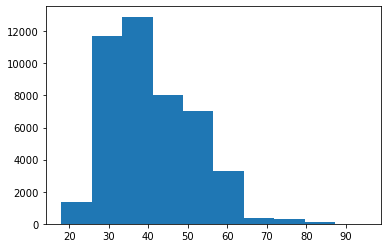

In [30]:
#plot the histogram of age variable.
plt.hist(inp1.age)
plt.show()

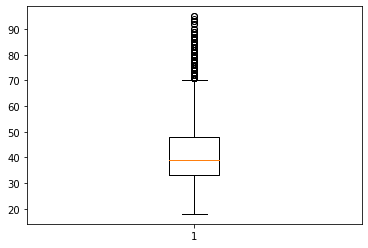

In [31]:
#plot the boxplot of age variable.
plt.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [32]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

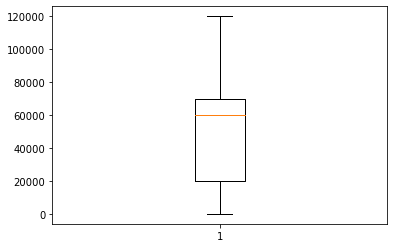

In [33]:
#plot the boxplot of salary variable.
plt.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [34]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

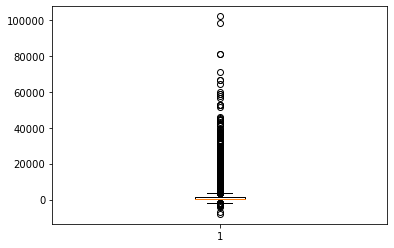

In [35]:
#plot the boxplot of balance variable.
plt.boxplot(inp1.balance)
plt.show()

In [36]:
#plot the boxplot of balance variable after scaling in 8:2.


In [37]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [38]:
#describe the duration variable of inp1
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45161 non-null  float64
 1   salary     45161 non-null  int64  
 2   balance    45161 non-null  int64  
 3   marital    45161 non-null  object 
 4   targeted   45161 non-null  object 
 5   default    45161 non-null  object 
 6   housing    45161 non-null  object 
 7   loan       45161 non-null  object 
 8   contact    45161 non-null  object 
 9   day        45161 non-null  int64  
 10  month      45161 non-null  object 
 11  duration   45161 non-null  object 
 12  campaign   45161 non-null  int64  
 13  pdays      8246 non-null   float64
 14  previous   45161 non-null  int64  
 15  poutcome   45161 non-null  object 
 16  response   45161 non-null  object 
 17  job        45161 non-null  object 
 18  education  45161 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usa

In [39]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration=inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.split()[1]=='sec'else float(x.split()[0]))

In [40]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         4.302774
std          4.293129
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate Analysis 

#### Marital status 

In [41]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

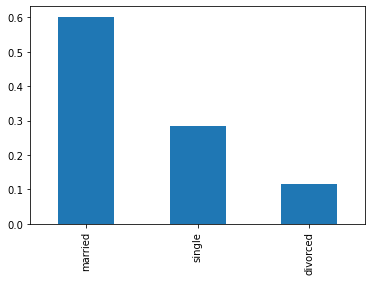

In [42]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.bar()
plt.show()

#### Job  

In [43]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

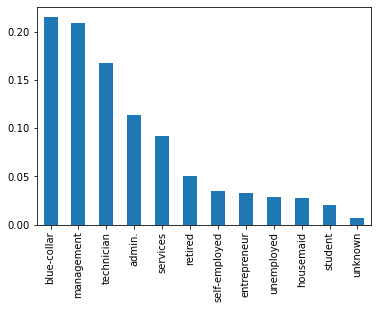

In [44]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.bar()
plt.show()

### Categorical ordered univariate analysis 

#### Education

In [45]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

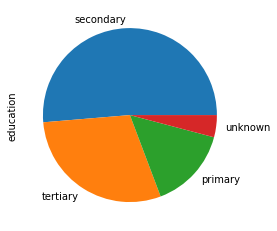

In [46]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

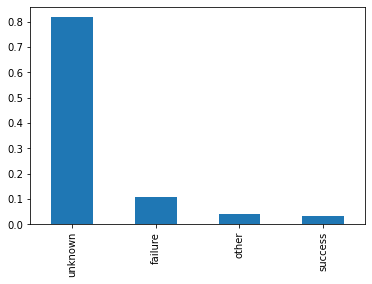

In [47]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable 

In [48]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

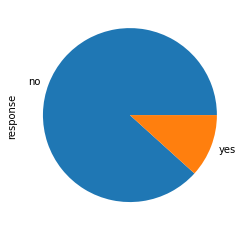

In [49]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Bivariate and Multivariate Analysis

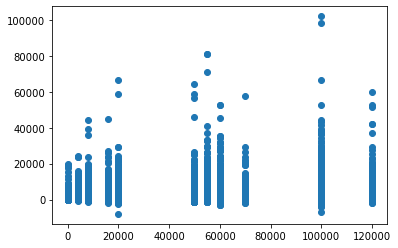

In [52]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary,inp1.balance)
plt.show()

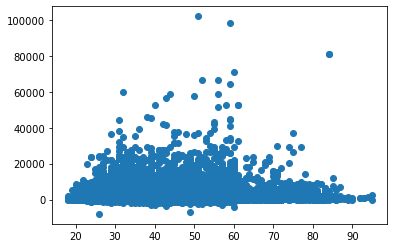

In [53]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp1.age,inp1.balance)
plt.show()

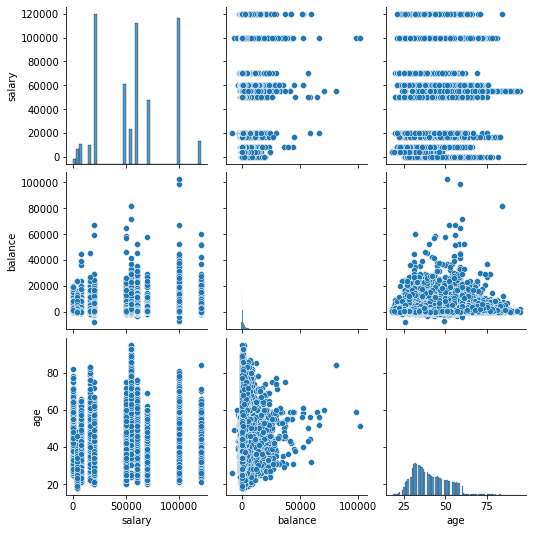

In [54]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=['salary','balance','age'])
plt.show()

#### Correlation heat map 

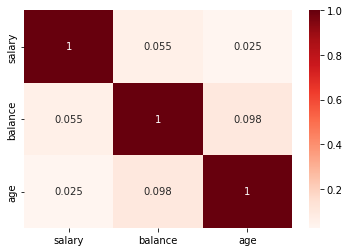

In [58]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[['salary','balance','age']].corr(),annot=True,cmap='Reds')
plt.show()

#### Salary vs response 

In [61]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby(by=['response'])['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [62]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby(by=['response'])['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

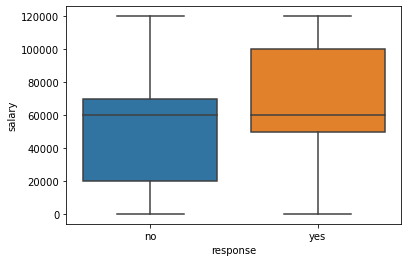

In [64]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x='response',y='salary')
plt.show()

#### Balance vs response 

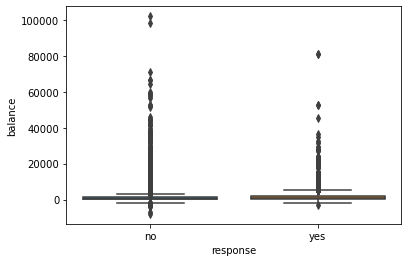

In [65]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x='response',y='balance')
plt.show()

In [67]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby(by=['response'])['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [68]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby(by=['response'])['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [69]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [70]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby(by=['response'])['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


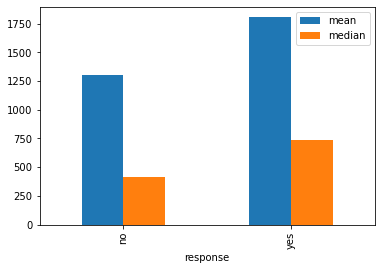

In [72]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby(by=['response'])['balance'].aggregate(['mean','median']).plot.bar()
plt.show()
                                            

#### Education vs salary 

In [73]:
#groupby the education to find the mean of the salary education category.
inp1.groupby(by=['education'])['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [74]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby(by=['education'])['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

<AxesSubplot:xlabel='job'>

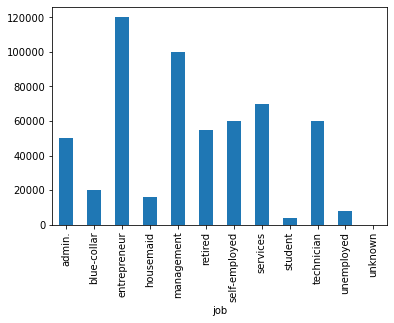

In [76]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby(by=['job'])['salary'].mean().plot.bar()

In [111]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag']=np.where(inp1.response=='yes',1,0)
inp1.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [87]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(by=['education'])['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [88]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(by=['marital'])['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='marital'>

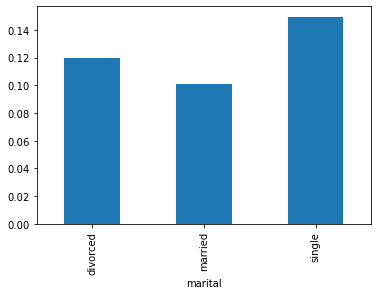

In [89]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(by=['marital'])['response_flag'].mean().plot.bar()

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

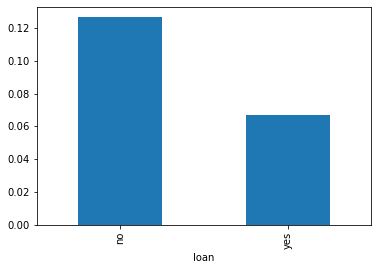

In [90]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(by=['loan'])['response_flag'].mean().plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

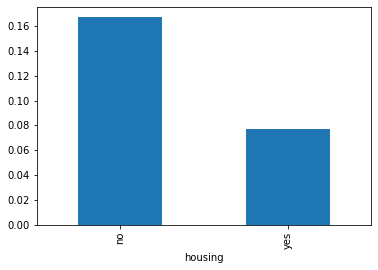

In [91]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(by=['housing'])['response_flag'].mean().plot.bar()

#### Age vs response 

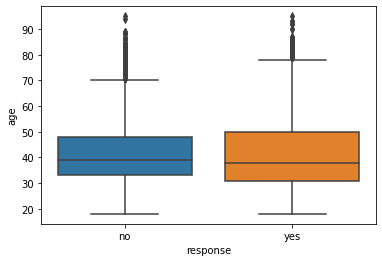

In [94]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1,x='response',y='age')
plt.show()

##### making buckets from age columns 

In [95]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['age_group']=pd.cut(inp1.age,[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])

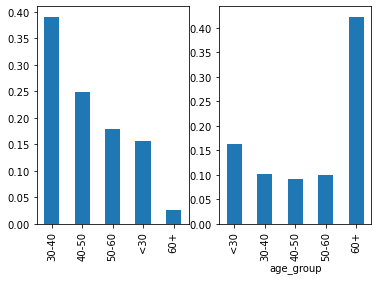

In [96]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(by=['age_group'])['response_flag'].mean().plot.bar()
plt.show()

### Multivariate analysis 

#### Education vs marital vs response 

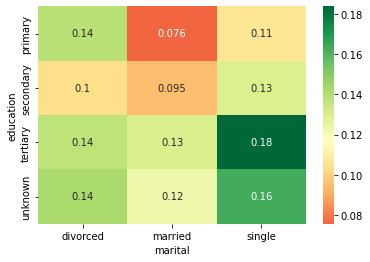

In [110]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp1,index='education',columns='marital',values='response_flag')
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Job vs marital vs response 

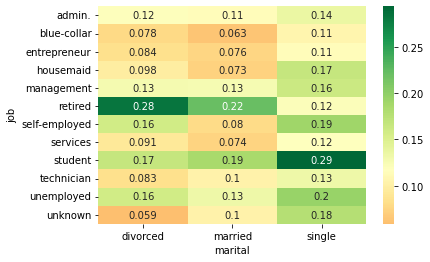

In [103]:
#create the heat map of Job vs marital vs response_flag.
res=pd.pivot_table(data=inp1,index='job',columns='marital',values='response_flag')
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Education vs poutcome vs response

In [108]:
#create the heat map of education vs poutcome vs response_flag.
inp1[inp1.pdays>0].response_flag.mean()

0.2307785593014795

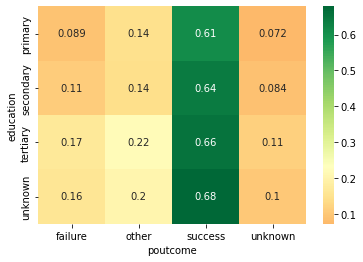

In [109]:
res=pd.pivot_table(data=inp1,index='education',columns='poutcome',values='response_flag')
sns.heatmap(res,annot=True,cmap='RdYlGn',center=0.2307)
plt.show()